In [1]:
# Pràctica 6 secció 2a


In [1]:
var("x y");

In [2]:
eq1=y*(x+2*y-2)

In [3]:
eq2=x*(-4*x-3*y+1)

In [4]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0], [x == 0, y == 1], [x == (1/4), y == 0], [x == (-4/5), y == (7/5)]]

In [5]:
px1=sol[0][0].rhs();px1

0

In [6]:
py1=sol[0][1].rhs();py1

0

In [7]:
px2=sol[1][0].rhs();px2

0

In [8]:
py2=sol[1][1].rhs();py2

1

In [9]:
px3=sol[2][0].rhs();px3

1/4

In [10]:
py3=sol[2][1].rhs();py3

0

In [11]:
px4=sol[3][0].rhs();px4

-4/5

In [12]:
py4=sol[3][1].rhs();py4

7/5

In [13]:
qx=min(px1,px2,px3,px4);qx

-4/5

In [14]:
qy=min(py1,py2,py3,py4);qy

0

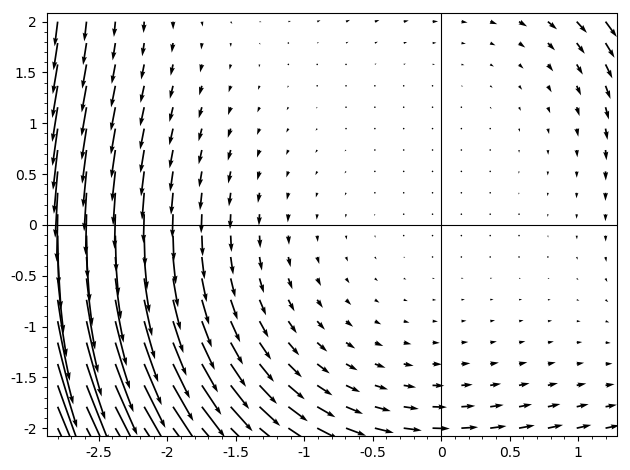

In [15]:
plot=plot_vector_field((eq1,eq2), (x,qx-2,qx+2), (y,qy-2,qy+2));plot

In [18]:
var('t');
x1=function('x1')(t);
y1=function('y1')(t);
eqd1=diff(x1(t),t)==eq1.subs(x=x1(t),y=y1(t));
eqd2=diff(y1(t),t)==eq2.subs(x=x1(t),y=y1(t));
eqd2


diff(y1(t), t) == -(4*x1(t) + 3*y1(t) - 1)*x1(t)

In [19]:
# Estudiem primer que és cada punt singular

In [20]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]);A

[             y    x + 4*y - 2]
[-8*x - 3*y + 1           -3*x]

In [22]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[ 0 -2]
[ 1  0]

In [23]:
A.eigenvalues()

[-I*sqrt(2), I*sqrt(2)]

In [24]:
# Pot ser un centre o un focus feble. No cal integrar res per ara.

In [25]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px2,y=py2);A

[ 1  2]
[-2  0]

In [26]:
A.eigenvalues()

[-1/2*I*sqrt(15) + 1/2, 1/2*I*sqrt(15) + 1/2]

In [23]:
# Es un focus repulsor. No cal integrar res per ara.

In [27]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px3,y=py3);A

[   0 -7/4]
[  -1 -3/4]

In [28]:
A.eigenvalues()

[1, -7/4]

In [27]:
# Es una SELLA. Busquem les seves separatrius. Volco el (px3,py3)=(px,py) per evitar de tocar les equacions

In [29]:
px=px3;py=py3;

In [30]:
vec=A.eigenvectors_right();vec

[(1, [(1, -4/7)], 1), (-7/4, [(1, 1)], 1)]

In [31]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi
step1=0.01 # El pas de integració

In [32]:
sol=desolve_system([eqd1, eqd2],[x1,y1],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]]);sol

[x1(t) == ilt(1/350*(7*g1531*(50*laplace(x1(t)*y1(t), t, g1531) + 100*laplace(y1(t)^2, t, g1531) + 13) + 2800*laplace(x1(t)^2, t, g1531) + 2100*laplace(x1(t)*y1(t), t, g1531) + 4)/(g1531^2 + 2), g1531, t),
 y1(t) == ilt(-1/350*(2*g1531*(700*laplace(x1(t)^2, t, g1531) + 525*laplace(x1(t)*y1(t), t, g1531) + 1) - 350*laplace(x1(t)*y1(t), t, g1531) - 700*laplace(y1(t)^2, t, g1531) - 91)/(g1531^2 + 2), g1531, t)]

In [32]:
# No hi ha garanties de que aquests sistemes d'equacions no lineals puguin tenir solució. De fet aquesta solució no ens
# serveix doncs està en forma implícita (x depèn de y i y depèn de x) i a més apareixen funcions integrals.
# Arriba el moment dels mètodes d'integració numèrics.

In [33]:
kt=4;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [32]:
# Per a la integració numèrica ja no necessitem que x i y siguin definides com a funcions de t.

# Si el valor propi és positiu, integrem en el sentit positiu del temps (sistema normal)
# Si el valor propi és negatiu, integrem en el sentit negatiu del temps (sistema canviat de signe)

In [34]:
sol

[[0, 0.260000000000000, -0.00571428571428571],
 [0.01, 0.2601006043557981, -0.005774015519240267],
 [0.02, 0.2602022612472339, -0.00583435238599943],
 [0.03, 0.2603049813998886, -0.005895303262205882],
 [0.04, 0.2604087756625202, -0.005956875170391039],
 [0.05, 0.2605136550084061, -0.006019075209050459],
 [0.06, 0.2606196305367043, -0.006081910553733073],
 [0.07, 0.2607267134738347, -0.006145388458144522],
 [0.08, 0.2608349151748802, -0.006209516255264878],
 [0.09, 0.2609442471250084, -0.00627430135848101],
 [0.1, 0.2610547209409133, -0.006339751262733912],
 [0.11, 0.2611663483722783, -0.006405873545681254],
 [0.12, 0.2612791413032605, -0.006472675868875467],
 [0.13, 0.2613931117539953, -0.006540165978957661],
 [0.14, 0.2615082718821241, -0.006608351708867676],
 [0.15, 0.261624633984343, -0.006677240979070576],
 [0.16, 0.2617422104979745, -0.006746841798799916],
 [0.17, 0.2618610140025612, -0.00681716226731808],
 [0.18, 0.2619810572214826, -0.006888210575194043],
 [0.19, 0.262102353023

In [34]:
sol1=[[j,k] for i,j,k in sol]

In [36]:
sol1

[[0.260000000000000, -0.00571428571428571],
 [0.2601006043557981, -0.005774015519240267],
 [0.2602022612472339, -0.00583435238599943],
 [0.2603049813998886, -0.005895303262205882],
 [0.2604087756625202, -0.005956875170391039],
 [0.2605136550084061, -0.006019075209050459],
 [0.2606196305367043, -0.006081910553733073],
 [0.2607267134738347, -0.006145388458144522],
 [0.2608349151748802, -0.006209516255264878],
 [0.2609442471250084, -0.00627430135848101],
 [0.2610547209409133, -0.006339751262733912],
 [0.2611663483722783, -0.006405873545681254],
 [0.2612791413032605, -0.006472675868875467],
 [0.2613931117539953, -0.006540165978957661],
 [0.2615082718821241, -0.006608351708867676],
 [0.261624633984343, -0.006677240979070576],
 [0.2617422104979745, -0.006746841798799916],
 [0.2618610140025612, -0.00681716226731808],
 [0.2619810572214826, -0.006888210575194043],
 [0.2621023530235959, -0.00695999500559887],
 [0.2622249144248989, -0.0070325239356193],
 [0.2623487545902189, -0.007105805837589756

In [35]:
if(vec[0][0]<0):
    sep1=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep1=list_plot(sol1,color="red")

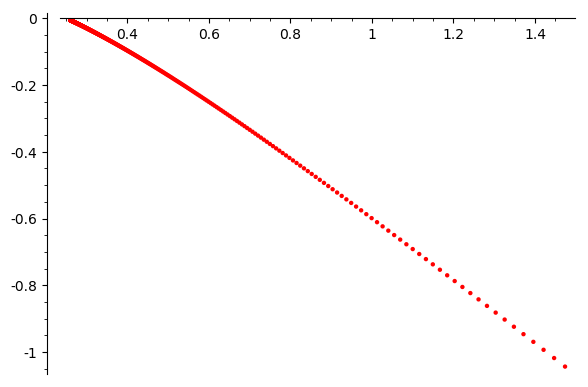

In [36]:
sep1

In [37]:
kt=5;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [38]:
sol1=[[j,k] for i,j,k in sol]

In [39]:
if(vec[0][0]<0):
    sep2=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep2=list_plot(sol1,color="red")

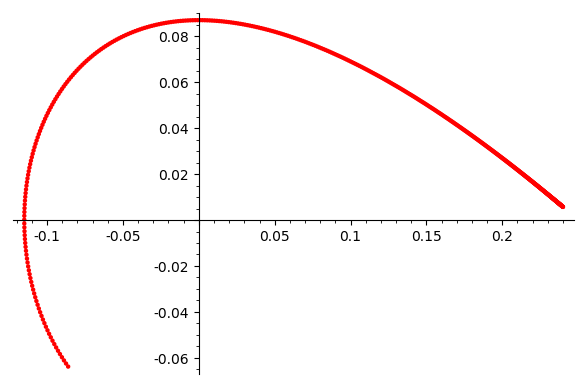

In [40]:
sep2

In [41]:
kt=10;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [42]:
sol1=[[j,k] for i,j,k in sol]

In [43]:
if(vec[1][0]<0):
    sep3=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep3=list_plot(sol1,color="red")

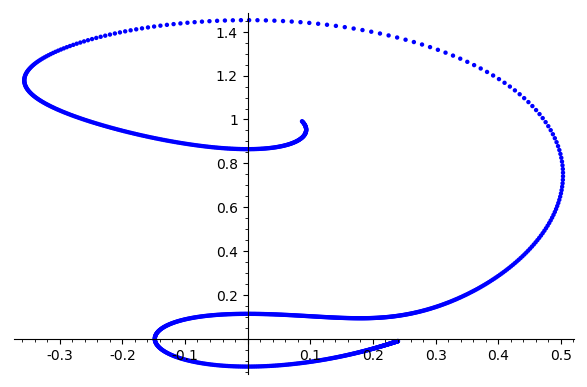

In [44]:
sep3

In [45]:
kt=10;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [46]:
sol1=[[j,k] for i,j,k in sol]

In [47]:
if(vec[1][0]<0):
    sep4=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep4=list_plot(sol1,color="red")

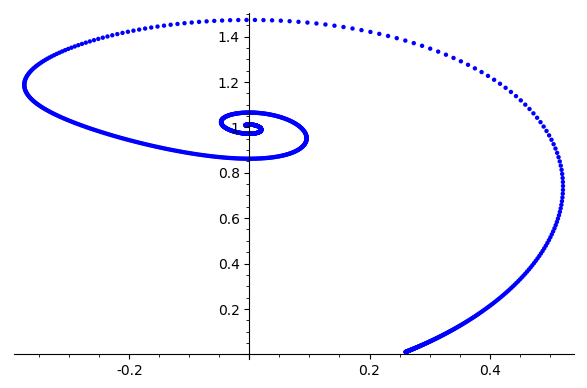

In [48]:
sep4

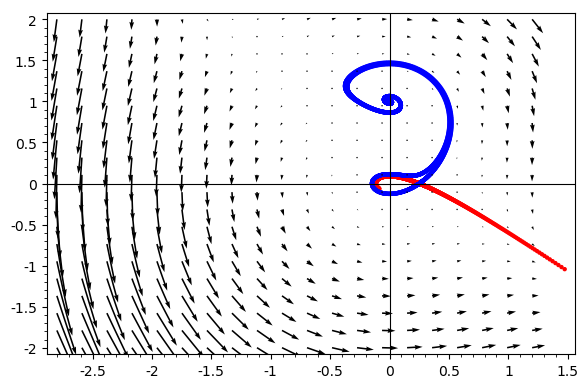

In [49]:
plot+sep1+sep2+sep3+sep4

In [45]:
# Anem pel quart punt singular

In [50]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px4,y=py4);A

[ 7/5 14/5]
[16/5 12/5]

In [51]:
A.eigenvalues()

[-1/10*sqrt(921) + 19/10, 1/10*sqrt(921) + 19/10]

In [52]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(-1.13479818109870, 4.93479818109870)

In [53]:
# Es un altre sella

In [54]:
px=px4;py=py4;

In [55]:
vec=A.eigenvectors_right();vec

[(-1/10*sqrt(921) + 19/10, [(1, -1/28*sqrt(921) + 5/28)], 1),
 (1/10*sqrt(921) + 19/10, [(1, 1/28*sqrt(921) + 5/28)], 1)]

In [56]:
kt=10;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [57]:
sol1=[[j,k] for i,j,k in sol]

In [58]:
if(vec[0][0]<0):
    sep5=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep5=list_plot(sol1,color="red")

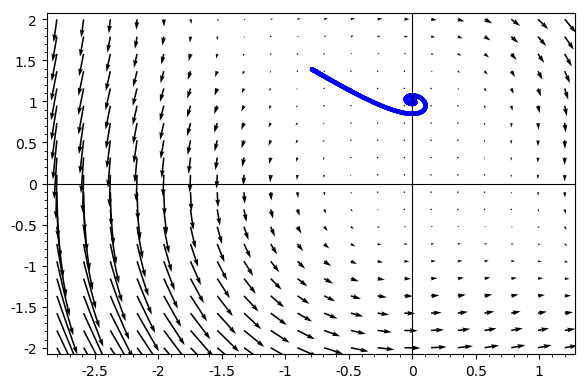

In [59]:
plot+sep5

In [60]:
kt=3.2;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [61]:
sol1=[[j,k] for i,j,k in sol]

In [62]:
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")

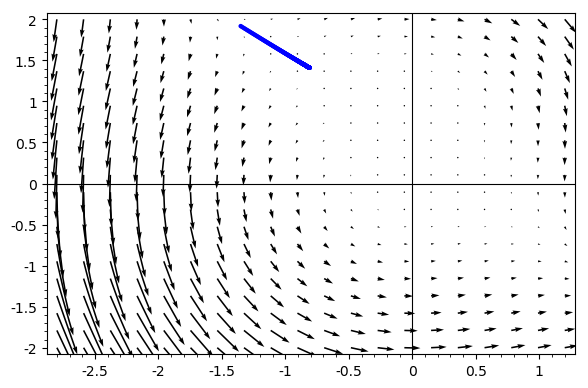

In [63]:
plot+sep6

In [64]:
kt=2.1;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [65]:
sol1=[[j,k] for i,j,k in sol]

In [66]:
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")

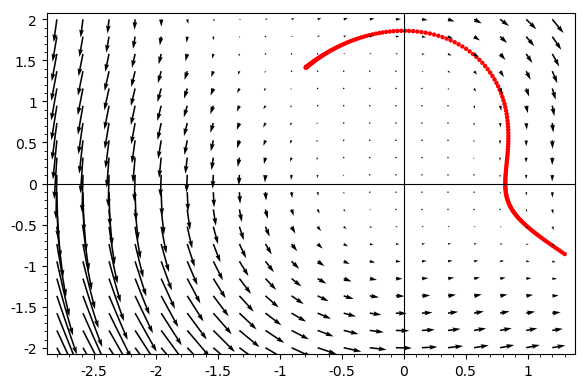

In [67]:
plot+sep7

In [68]:
kt=1.3;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [69]:
sol1=[[j,k] for i,j,k in sol]

In [70]:
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")

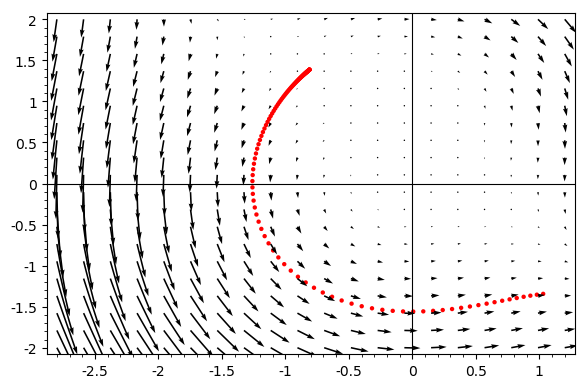

In [71]:
plot+sep8

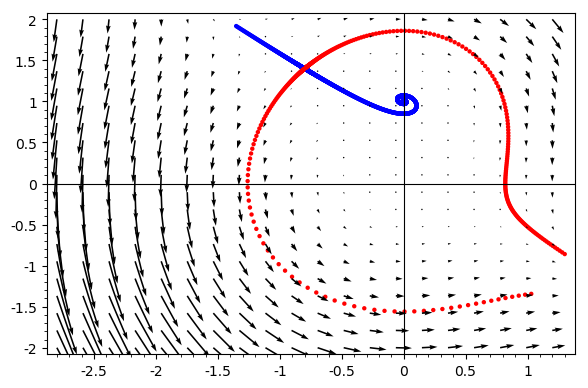

In [72]:
plot+sep5+sep6+sep7+sep8

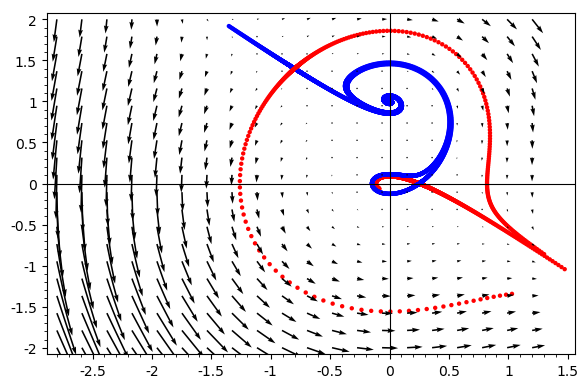

In [73]:
plot+sep1+sep2+sep3+sep4+sep5+sep6+sep7+sep8

In [74]:
# Amb el veiem aquí, i sapiguent que no hi ha més punts singulars, 
# ja podem saber que farà qualsevol altra òrbita que passi per un punt concret.

In [69]:
px=-0.5;py=0.;kt=1.2;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [70]:
sol1=[[j,k] for i,j,k in sol]

In [71]:
orb1=list_plot(sol1,color="yellow")

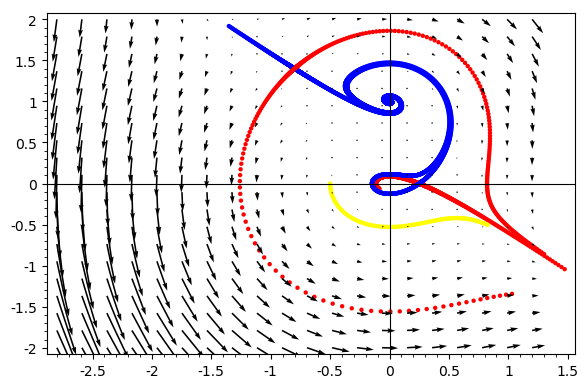

In [72]:
plot+sep1+sep2+sep3+sep4+sep5+sep6+sep7+sep8+orb1

In [80]:
kt=5;sol=desolve_system_rk4([-eq1, -eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [100]:
sol1=[[j,k] for i,j,k in sol]

In [101]:
orb2=list_plot(sol1,color="yellow")

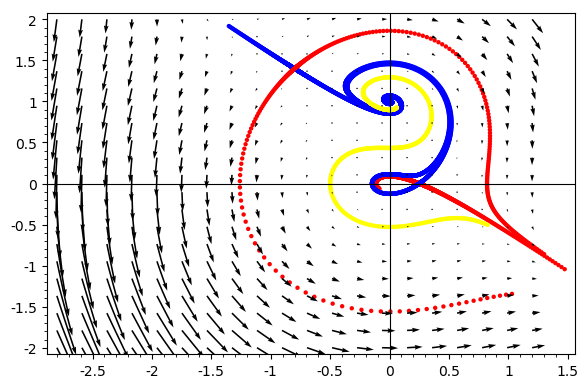

In [79]:
plot+sep1+sep2+sep3+sep4+sep5+sep6+sep7+sep8+orb1+orb2